In [5]:
# import torch
# from torchvision import datasets, transforms #TORCHVISION isnt working for me for some reason
# from torch.utils.data import random_split, DataLoader
# import matplotlib.pyplot as plt

# # Define transformations
# transform = transforms.Compose([
#     transforms.Resize((128, 128)),  # Resize images to a uniform size
#     transforms.ToTensor(),          # Convert images to tensors
# ])

# # Load the dataset
# data_dir = "data/train"
# dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# # Display some images with labels
# def show_images(dataset, num_images=6):
#     fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
#     for i in range(num_images):
#         img, label = dataset[i]
#         axes[i].imshow(img.permute(1, 2, 0))  # Convert tensor to image
#         axes[i].set_title(dataset.classes[label])  # Show class label
#         axes[i].axis("off")
#     plt.show()

# show_images(dataset)

# # Split into training and validation sets (80-20 split)
# train_size = int(0.8 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# # Create data loaders
# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# print(f"Training set size: {len(train_dataset)}, Validation set size: {len(val_dataset)}")


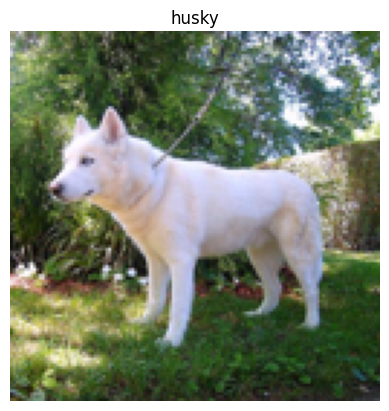

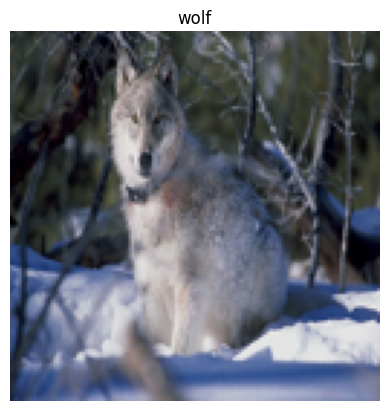

In [13]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define dataset path and categories
data_dir = "data/train"
categories = ["husky", "wolf"]
image_size = (128, 128)  # Resize images to a fixed size

dataset = []
labels = []

# Define augmentation functions
def random_rotation(image):
    return image.rotate(random.uniform(-30, 30)) #rotation is + or - 30 degrees

def random_flip(image):
    if random.random() > 0.5:  # 50% chance to flip
        return image.transpose(Image.FLIP_LEFT_RIGHT)
    return image

def random_crop(image, output_size):
    """Randomly crop an image and resize it back to the original size"""
    width, height = image.size
    left = random.randint(0, width // 4)
    top = random.randint(0, height // 4)
    right = width - random.randint(0, width // 4)
    bottom = height - random.randint(0, height // 4)
    return image.crop((left, top, right, bottom)).resize(output_size)

for label, category in enumerate(categories):
    category_path = os.path.join(data_dir, category)
    img_files = os.listdir(category_path)
    
    # Select a random image from the category and display it FOR TESTING, CAN REMOVE THIS PART AND THE PLT
    random_img = random.choice(img_files)
    img_path = os.path.join(category_path, random_img)
    img = Image.open(img_path).convert("RGB").resize(image_size)

    # Display the image
    plt.figure()
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")

    # Load all images into dataset
    for img_name in img_files:
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path).convert("RGB").resize(image_size)
        dataset.append(np.array(img))  # Convert image to NumPy array
        labels.append(label)  # Assign label
        # Augmented Images (Apply transformations randomly)
        for _ in range(2):  # Adding two augmented versions per image
            aug_img = random_rotation(random_flip(random_crop(img, image_size)))
            dataset.append(np.array(aug_img))
            labels.append(label)




In [12]:
# Convert lists to NumPy arrays
dataset = np.array(dataset, dtype=np.float32) / 255.0  # Normalize pixel values
labels = np.array(labels)

# Shuffle and split dataset (80-20) WE CAN CHANGE THE SPLIT AS WE WANT
indices = list(range(len(dataset)))
random.shuffle(indices)
split_idx = int(0.8 * len(dataset))

train_data, val_data = dataset[:split_idx], dataset[split_idx:]
train_labels, val_labels = labels[:split_idx], labels[split_idx:]

plt.show()  # Show the randomly selected images

print(f"Training set size: {len(train_data)}, Validation set size: {len(val_data)}")

Training set size: 80, Validation set size: 20
